## Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Import Dataset

In [2]:
df = pd.read_csv('tennis.csv', ';')
df

C:\Users\Arifina Resyuanti\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   outlook   14 non-null     object
 1   temp      14 non-null     object
 2   humidity  14 non-null     object
 3   windy     14 non-null     bool  
 4   play      14 non-null     object
dtypes: bool(1), object(4)
memory usage: 590.0+ bytes


In [4]:
df["outlook"].unique()

array(['sunny', 'overcast', 'rainy'], dtype=object)

In [5]:
col = ['outlook', 'temp', 'humidity', 'windy','play']
for i in col:
    print(df[i].unique())

['sunny' 'overcast' 'rainy']
['hot' 'mild ' 'cool']
['high' 'normal']
[False  True]
['no' 'yes']


In [6]:
outlook_map = ({
    'sunny':1, 
    'overcast':2,
    'rainy':3
})

temp_map = ({
    'hot':1,
    'mild ':2,
    'cool':3
})

humidity_map = ({
    'high':1,
    'normal':2
})

windy_map = ({
    False : 0,
    True : 1
})

play_map = ({
    'no':0,
    'yes':1
})

In [7]:
#perulangan untuk mengubah data kategori menjadi numerik
tennis_map = [outlook_map, temp_map, humidity_map, windy_map,play_map]
for kolom, my_map in zip (col, tennis_map):
    df[kolom]=df[kolom].map(my_map)

In [8]:
df

,outlook,temp,humidity,windy,play
0,1,1,1,0,0
1,1,1,1,1,0
2,2,1,1,0,1
3,3,2,1,0,1
4,3,3,2,0,1
5,3,3,2,1,0
6,2,3,2,1,1
7,1,2,1,0,0
8,1,3,2,0,1
9,3,2,2,0,1


In [23]:
# Penentuan label class
x = np.asarray(df.drop(["play"],axis=1))
y = np.asarray(df["play"])
y

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0], dtype=int64)

In [24]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=3)
model.fit(x,y)

DecisionTreeClassifier(max_depth=3)

In [25]:
x_baru = np.array([[5,3,2,1]])
y_baru = model.predict(x_baru)
y_baru

array([0], dtype=int64)

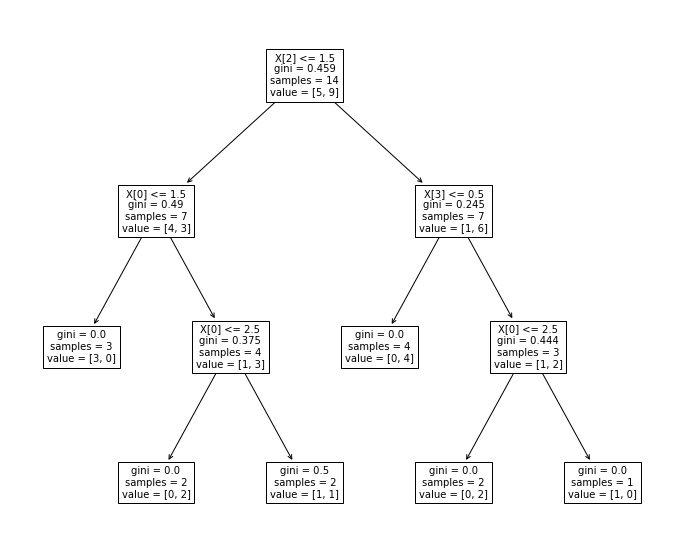

In [26]:
from sklearn.tree import plot_tree

plt.subplots(figsize=(12,10))
plot_tree(model, fontsize = 10)
plt.show()

In [21]:
# predict = model.predict(x_baru)

In [32]:
# from sklearn.metrics import accuracy_score

# print("Accuracy score: ", accuracy_score(y_baru) * 100)

TypeError: accuracy_score() missing 1 required positional argument: 'y_pred'